In [3]:
#For this project, I have visualized time series data using a line chart, bar chart, and box plots. 
#Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each 
#day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. 
#The data visualizations helps us understand the patterns in visits and identify yearly and monthly growth.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [68]:
#Importing data and parsing the date column
df=pd.read_csv("fcc-forum-pageviews.csv",parse_dates=['date'])
df = df.sort_values(by = 'date')
df.set_index('date',inplace=True)




In [69]:
#Cleaning the data by filtering out days when the page views were in the top 2.5% of
#the dataset or bottom 2.5% of the dataset.


df=df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]
df
                  


,value
date,
2016-01-07,28372
2016-01-08,20947
2016-01-09,40709
2016-01-10,49179
2016-01-11,25856
...,...
2019-12-06,107613
2019-12-07,112038
2019-12-08,87424


Figure(1600x500)


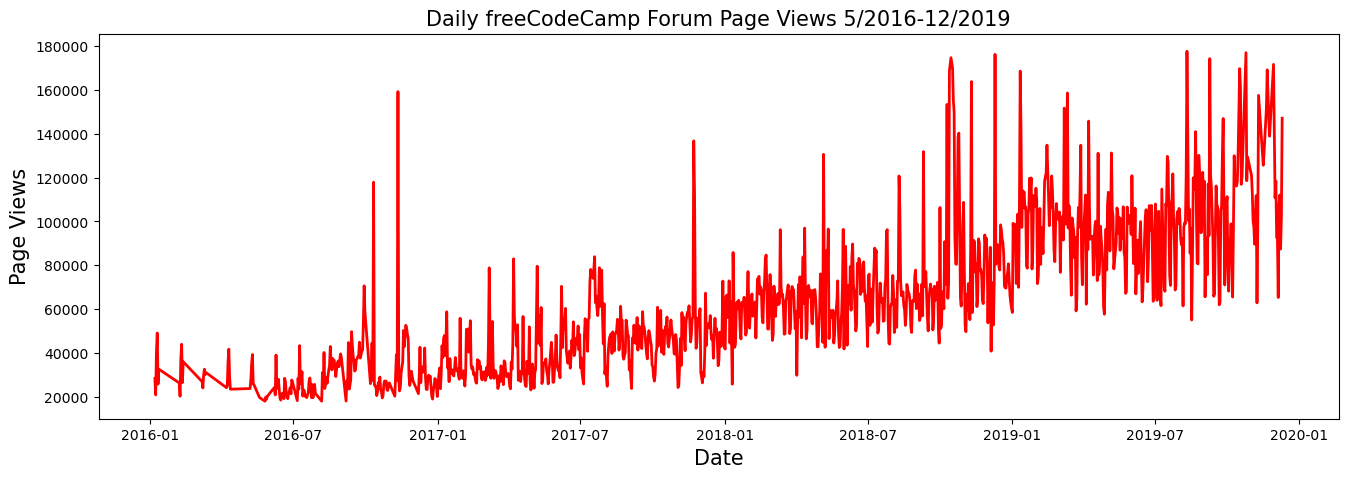

In [70]:
#Creating a draw_line_plot function that uses Matplotlib to draw a line chart (Date vs Page Views)
def draw_line_plot():
  width=16
  height=5
  df_line = df.copy()
  fig=plt.figure(figsize=(width,height))
  plt.plot(df_line.index,df_line['value'], color='red', linewidth=2)
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize=15)
  plt.xlabel('Date', fontsize=15)
  plt.ylabel('Page Views', fontsize=15)
  plt.grid(False)
  fig.savefig('line_plot.png')
  return fig



print(draw_line_plot())

Figure(1200x800)


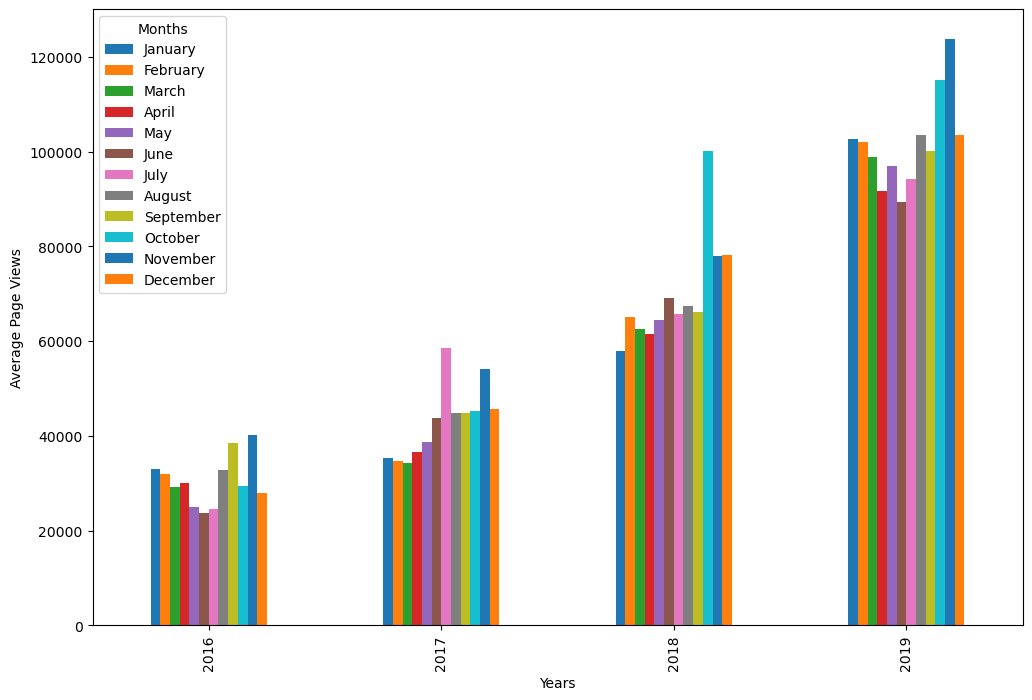

In [58]:
#Creating a draw_bar_plot function that draws a bar chart. It shows average
#daily page views for each month grouped by year. 

def draw_bar_plot():
    # Copying and modifying data for monthly bar plot
    df_bar = df.copy()
    df_bar = df_bar.groupby([(df_bar.index.year),(df_bar.index.month)]).mean()
    df_bar.index = df_bar.index.set_names(['year','month'])
    df_bar.reset_index(inplace=True)
    df_bar.set_index('year')
    
    # Drawing bar plot
    fig, ax = plt.subplots(figsize=(12,8))
    Months = {1 : "January", 2 : "February", 3 : "March", 4 : "April", 
              5 : "May" , 6 : "June", 7 : "July", 8 : "August", 
              9 : "September", 10 : "October" ,11 : "November",12 : "December"}
    df_bar.pivot(index='year',columns='month',values='value').rename(columns=Months).plot.bar(ax=ax)
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title = "Months")




    # Saving image and returning fig 
    fig.savefig('bar_plot.png')
    return fig



print(draw_bar_plot())




Figure(1600x500)


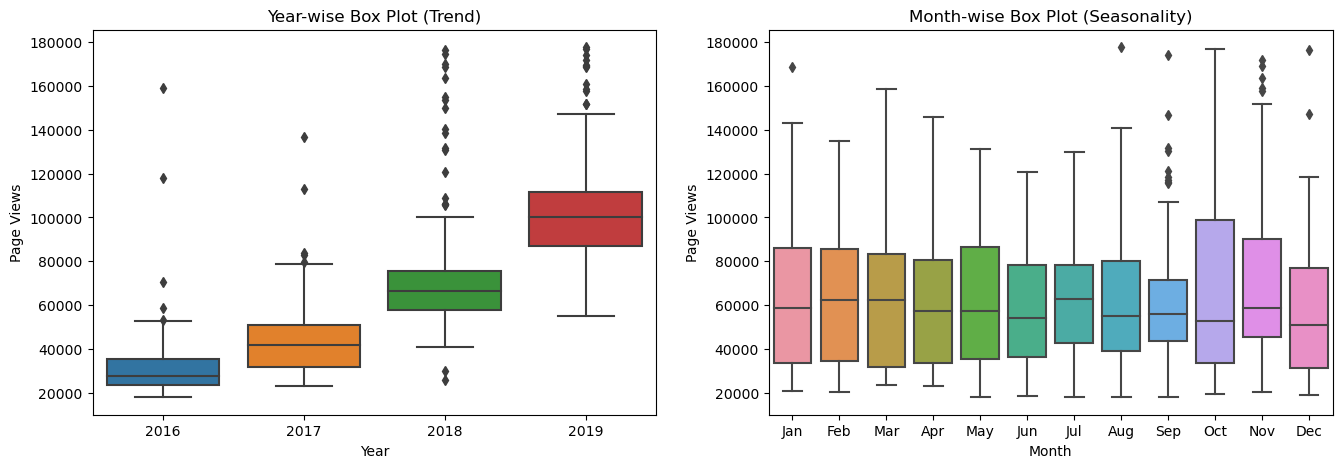

In [67]:
#Creating a draw_box_plot function that uses Seaborn to draw box plots. These box plots shows how the values 
#are distributed within a given year or month and how it compares over time. 
def draw_box_plot():
  fig,ax =plt.subplots(1,2,figsize=(16,5))
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
  plt.subplot(1, 2, 1) 
  sns.boxplot(x="year", y="value", data=df_box)
  plt.title("Year-wise Box Plot (Trend)")
  plt.xlabel("Year")
  plt.ylabel("Page Views")

  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_box['month'], y="value", data=df_box, order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
  plt.title("Month-wise Box Plot (Seasonality)")
  plt.xlabel("Month")
  plt.ylabel("Page Views")

  fig.savefig('box_plot.png')
  return fig



print(draw_box_plot())


In [ ]:
The End:)